In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional
from keras.optimizers import Adam

2024-06-12 19:41:38.270775: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the final_pairs from the CSV file
pair_df = pd.read_csv('filtered_pairs.csv')

# Verify the imported final_pairs
pair_df

,Pair 1,Pair 2
0,MDLZ,PEP
1,ESS,UDR
2,LNT,XEL
3,AEP,CMS
4,DUK,XEL
5,BAC,PNC
6,RSG,WM
7,ED,LNT
8,MCHP,NXPI
9,COF,FITB


In [3]:
# Load your stock data
file_path = 'SPY_cleaned_data.csv'
data = pd.read_csv(file_path, parse_dates=['date'], index_col='date')

# Initialize the all_stock_data dictionary
all_stock_data = {}

# Assuming pair_df is already defined and contains 'Pair 1' and 'Pair 2'
for index, row in pair_df.iterrows():
    pair = [row['Pair 1'], row['Pair 2']]
    
    # Filter the data for the given pair
    if pair[0] in data.columns and pair[1] in data.columns:
        pair_data = data[[pair[0], pair[1]]]
        all_stock_data[tuple(pair)] = pair_data

all_stock_data

{('MDLZ',
  'PEP'):              MDLZ     PEP
 date                     
 2012-06-01  37.57   67.51
 2012-06-04  37.65   67.48
 2012-06-05  37.60   67.00
 2012-06-06  37.98   67.49
 2012-06-07  38.15   67.68
 ...           ...     ...
 2024-06-03  67.35  171.23
 2024-06-04  68.09  173.89
 2024-06-05  67.98  173.49
 2024-06-06  68.19  173.20
 2024-06-07  67.81  171.04
 
 [3024 rows x 2 columns],
 ('ESS',
  'UDR'):                ESS    UDR
 date                     
 2012-06-01  147.96  25.35
 2012-06-04  146.97  25.22
 2012-06-05  150.60  25.71
 2012-06-06  153.48  26.12
 2012-06-07  151.43  25.72
 ...            ...    ...
 2024-06-03  260.63  38.86
 2024-06-04  263.81  39.59
 2024-06-05  268.08  39.76
 2024-06-06  268.32  39.60
 2024-06-07  268.07  39.67
 
 [3024 rows x 2 columns],
 ('LNT',
  'XEL'):                LNT    XEL
 date                     
 2012-06-01  21.705  27.96
 2012-06-04  21.735  28.12
 2012-06-05  21.940  28.28
 2012-06-06  22.220  28.54
 2012-06-07  22.345  28.4

Epoch 1/20
38/38 [==============================] - 33s 121ms/step - loss: 1.0855
Epoch 2/20
38/38 [==============================] - 4s 112ms/step - loss: 0.9578
Epoch 3/20
38/38 [==============================] - 4s 116ms/step - loss: 0.6520
Epoch 4/20
38/38 [==============================] - 4s 114ms/step - loss: 0.2581
Epoch 5/20
38/38 [==============================] - 4s 111ms/step - loss: 0.1311
Epoch 6/20
38/38 [==============================] - 4s 117ms/step - loss: 0.1623
Epoch 7/20
38/38 [==============================] - 5s 133ms/step - loss: 0.1143
Epoch 8/20
38/38 [==============================] - 4s 119ms/step - loss: 0.0640
Epoch 9/20
38/38 [==============================] - 4s 107ms/step - loss: 0.0630
Epoch 10/20
38/38 [==============================] - 4s 119ms/step - loss: 0.0827
Epoch 11/20
38/38 [==============================] - 3s 87ms/step - loss: 0.0911
Epoch 12/20
38/38 [==============================] - 3s 77ms/step - loss: 0.0692
Epoch 13/20
38/38 [=======

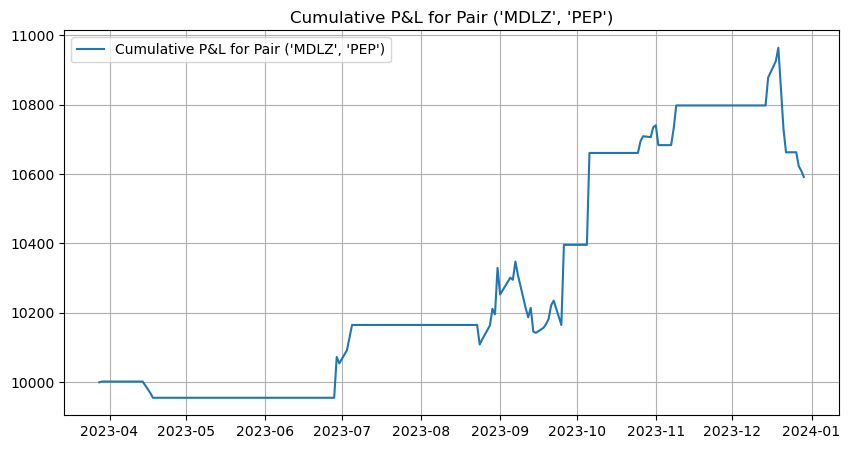

Performance for pair ('MDLZ', 'PEP'):
Cumulative Return: 7.83%
Sharpe Ratio: 1.34
Sortino Ratio: 0.17
Max Drawdown: -3.40%
Test R²: 0.94


Epoch 1/20
38/38 [==============================] - 30s 114ms/step - loss: 1.0286
Epoch 2/20
38/38 [==============================] - 4s 114ms/step - loss: 0.7924
Epoch 3/20
38/38 [==============================] - 4s 110ms/step - loss: 0.3265
Epoch 4/20
38/38 [==============================] - 4s 106ms/step - loss: 0.1744
Epoch 5/20
38/38 [==============================] - 4s 115ms/step - loss: 0.2011
Epoch 6/20
38/38 [==============================] - 4s 108ms/step - loss: 0.1823
Epoch 7/20
38/38 [==============================] - 4s 105ms/step - loss: 0.0861
Epoch 8/20
38/38 [==============================] - 4s 101ms/step - loss: 0.1429
Epoch 9/20
38/38 [==============================] - 4s 108ms/step - loss: 0.0846
Epoch 10/20
38/38 [==============================] - 4s 107ms/step - loss: 0.1356
Epoch 11/20
38/38 [==============================] - 4s 106ms/step - loss: 0.0833
Epoch 12/20
38/38 [==============================] - 5s 121ms/step - loss: 0.0832
Epoch 13/20
38/38 [=====

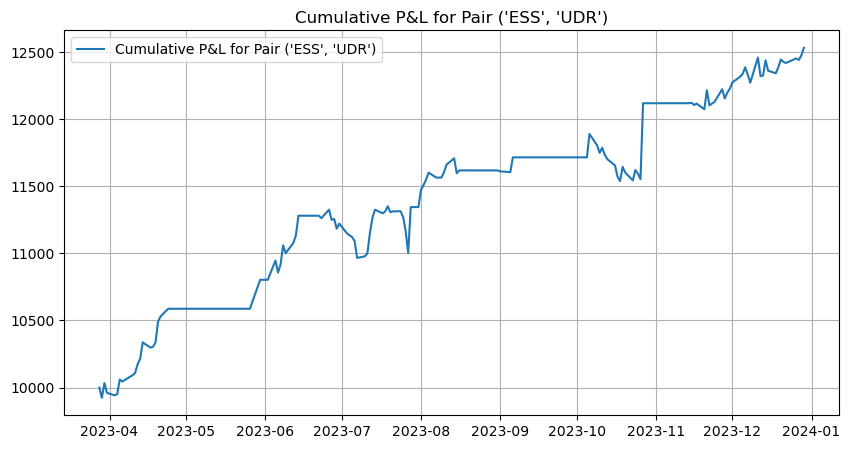

Performance for pair ('ESS', 'UDR'):
Cumulative Return: 34.49%
Sharpe Ratio: 2.91
Sortino Ratio: 0.43
Max Drawdown: -3.17%
Test R²: 0.68


Epoch 1/20
38/38 [==============================] - 20s 70ms/step - loss: 1.0151
Epoch 2/20
38/38 [==============================] - 3s 78ms/step - loss: 0.9323
Epoch 3/20
38/38 [==============================] - 3s 73ms/step - loss: 0.6714
Epoch 4/20
38/38 [==============================] - 3s 73ms/step - loss: 0.2983
Epoch 5/20
38/38 [==============================] - 3s 73ms/step - loss: 0.2006
Epoch 6/20
38/38 [==============================] - 3s 71ms/step - loss: 0.1463
Epoch 7/20
38/38 [==============================] - 3s 70ms/step - loss: 0.1179
Epoch 8/20
38/38 [==============================] - 3s 74ms/step - loss: 0.0873
Epoch 9/20
38/38 [==============================] - 3s 75ms/step - loss: 0.0889
Epoch 10/20
38/38 [==============================] - 3s 70ms/step - loss: 0.1661
Epoch 11/20
38/38 [==============================] - 3s 79ms/step - loss: 0.0866
Epoch 12/20
38/38 [==============================] - 3s 69ms/step - loss: 0.0575
Epoch 13/20
38/38 [=================

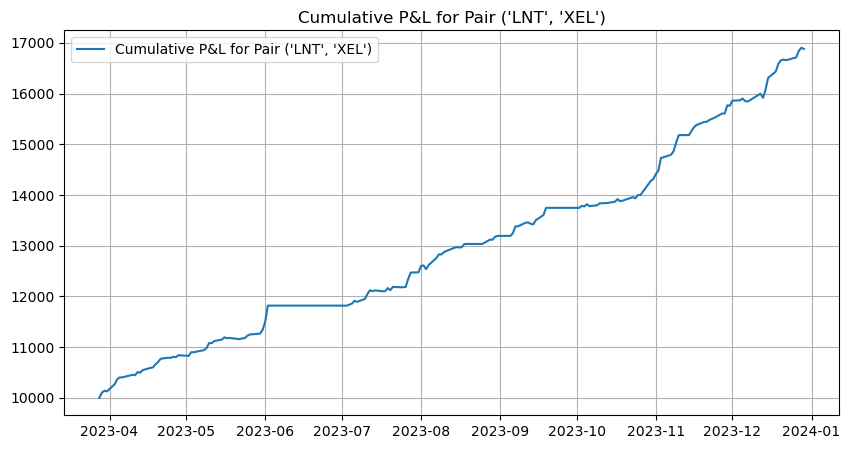

Performance for pair ('LNT', 'XEL'):
Cumulative Return: 98.83%
Sharpe Ratio: 9.97
Sortino Ratio: 3.34
Max Drawdown: -0.57%
Test R²: 0.97


Epoch 1/20
38/38 [==============================] - 9s 50ms/step - loss: 1.0216
Epoch 2/20
38/38 [==============================] - 2s 60ms/step - loss: 0.9502
Epoch 3/20
38/38 [==============================] - 3s 68ms/step - loss: 0.7757
Epoch 4/20
38/38 [==============================] - 3s 72ms/step - loss: 0.3244
Epoch 5/20
38/38 [==============================] - 3s 81ms/step - loss: 0.1891
Epoch 6/20
38/38 [==============================] - 3s 66ms/step - loss: 0.1987
Epoch 7/20
38/38 [==============================] - 3s 73ms/step - loss: 0.1049
Epoch 8/20
38/38 [==============================] - 3s 87ms/step - loss: 0.0911
Epoch 9/20
38/38 [==============================] - 5s 138ms/step - loss: 0.1129
Epoch 10/20
38/38 [==============================] - 4s 104ms/step - loss: 0.0821
Epoch 11/20
38/38 [==============================] - 3s 78ms/step - loss: 0.0719
Epoch 12/20
38/38 [==============================] - 3s 70ms/step - loss: 0.0703
Epoch 13/20
38/38 [================

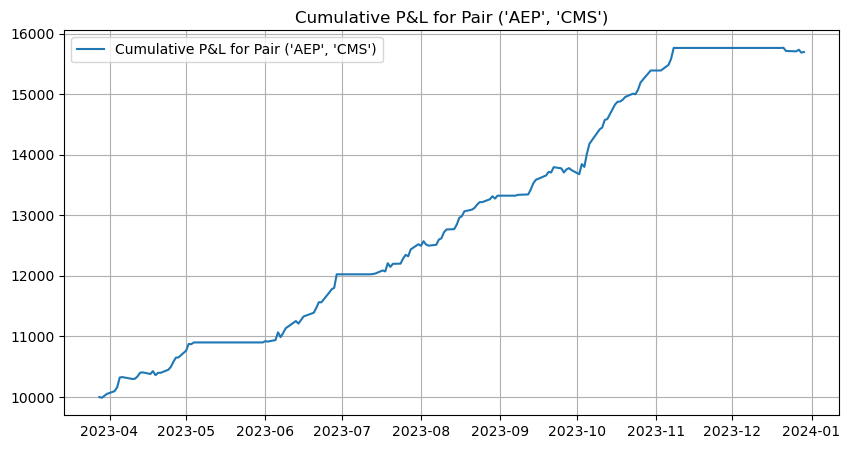

Performance for pair ('AEP', 'CMS'):
Cumulative Return: 80.70%
Sharpe Ratio: 8.69
Sortino Ratio: 1.95
Max Drawdown: -0.84%
Test R²: 0.96


Epoch 1/20
38/38 [==============================] - 12s 47ms/step - loss: 1.0498
Epoch 2/20
38/38 [==============================] - 2s 59ms/step - loss: 0.9498
Epoch 3/20
38/38 [==============================] - 3s 69ms/step - loss: 0.6454
Epoch 4/20
38/38 [==============================] - 3s 71ms/step - loss: 0.3006
Epoch 5/20
38/38 [==============================] - 2s 62ms/step - loss: 0.1628
Epoch 6/20
38/38 [==============================] - 3s 68ms/step - loss: 0.1211
Epoch 7/20
38/38 [==============================] - 3s 68ms/step - loss: 0.1195
Epoch 8/20
38/38 [==============================] - 3s 75ms/step - loss: 0.0785
Epoch 9/20
38/38 [==============================] - 3s 81ms/step - loss: 0.1391
Epoch 10/20
38/38 [==============================] - 3s 72ms/step - loss: 0.0658
Epoch 11/20
38/38 [==============================] - 3s 66ms/step - loss: 0.0701
Epoch 12/20
38/38 [==============================] - 3s 70ms/step - loss: 0.0428
Epoch 13/20
38/38 [=================

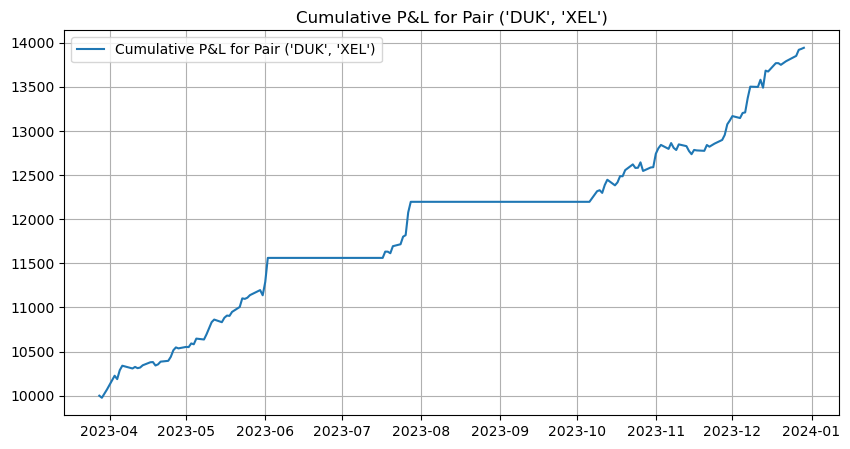

Performance for pair ('DUK', 'XEL'):
Cumulative Return: 54.70%
Sharpe Ratio: 6.54
Sortino Ratio: 1.38
Max Drawdown: -0.98%
Test R²: 0.96


Epoch 1/20
38/38 [==============================] - 9s 43ms/step - loss: 1.0261
Epoch 2/20
38/38 [==============================] - 2s 47ms/step - loss: 0.8219
Epoch 3/20
38/38 [==============================] - 2s 54ms/step - loss: 0.3304
Epoch 4/20
38/38 [==============================] - 2s 53ms/step - loss: 0.1324
Epoch 5/20
38/38 [==============================] - 2s 60ms/step - loss: 0.1334
Epoch 6/20
38/38 [==============================] - 2s 56ms/step - loss: 0.0797
Epoch 7/20
38/38 [==============================] - 2s 61ms/step - loss: 0.0727
Epoch 8/20
38/38 [==============================] - 2s 62ms/step - loss: 0.0814
Epoch 9/20
38/38 [==============================] - 2s 61ms/step - loss: 0.0420
Epoch 10/20
38/38 [==============================] - 2s 64ms/step - loss: 0.1359
Epoch 11/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0704
Epoch 12/20
38/38 [==============================] - 2s 62ms/step - loss: 0.0750
Epoch 13/20
38/38 [==================

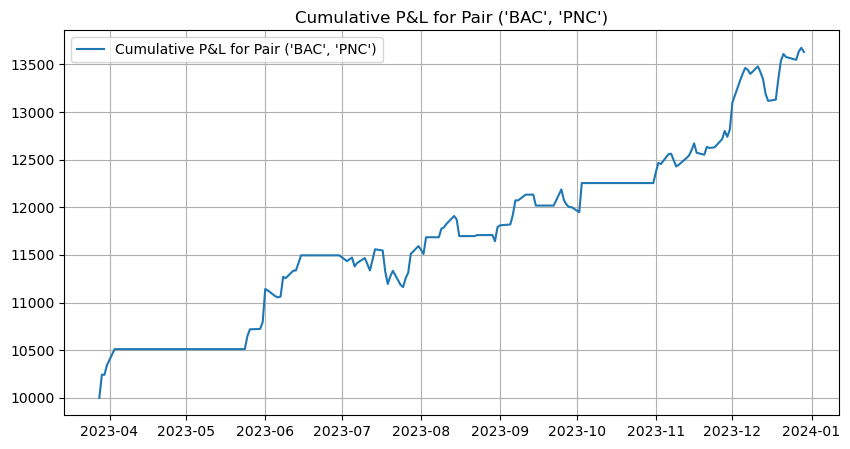

Performance for pair ('BAC', 'PNC'):
Cumulative Return: 50.15%
Sharpe Ratio: 3.90
Sortino Ratio: 0.54
Max Drawdown: -3.43%
Test R²: 0.95


Epoch 1/20
38/38 [==============================] - 9s 49ms/step - loss: 1.0233
Epoch 2/20
38/38 [==============================] - 2s 52ms/step - loss: 0.9517
Epoch 3/20
38/38 [==============================] - 2s 53ms/step - loss: 0.6396
Epoch 4/20
38/38 [==============================] - 3s 68ms/step - loss: 0.2550
Epoch 5/20
38/38 [==============================] - 2s 55ms/step - loss: 0.1671
Epoch 6/20
38/38 [==============================] - 2s 58ms/step - loss: 0.1612
Epoch 7/20
38/38 [==============================] - 3s 67ms/step - loss: 0.1166
Epoch 8/20
38/38 [==============================] - 2s 61ms/step - loss: 0.1000
Epoch 9/20
38/38 [==============================] - 2s 65ms/step - loss: 0.0868
Epoch 10/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0814
Epoch 11/20
38/38 [==============================] - 2s 62ms/step - loss: 0.0825
Epoch 12/20
38/38 [==============================] - 2s 63ms/step - loss: 0.0616
Epoch 13/20
38/38 [==================

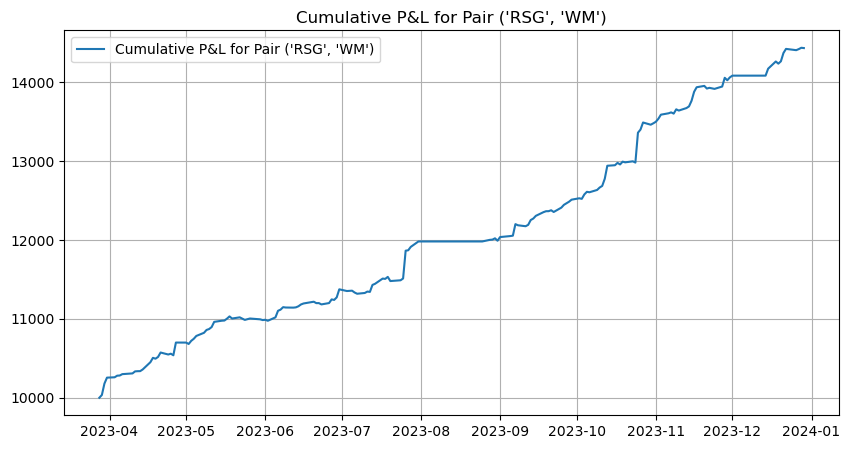

Performance for pair ('RSG', 'WM'):
Cumulative Return: 61.90%
Sharpe Ratio: 7.33
Sortino Ratio: 2.62
Max Drawdown: -0.50%
Test R²: 0.95


Epoch 1/20
38/38 [==============================] - 8s 41ms/step - loss: 1.0273
Epoch 2/20
38/38 [==============================] - 2s 53ms/step - loss: 0.9707
Epoch 3/20
38/38 [==============================] - 2s 56ms/step - loss: 0.8124
Epoch 4/20
38/38 [==============================] - 2s 54ms/step - loss: 0.4296
Epoch 5/20
38/38 [==============================] - 2s 61ms/step - loss: 0.2083
Epoch 6/20
38/38 [==============================] - 2s 60ms/step - loss: 0.2050
Epoch 7/20
38/38 [==============================] - 2s 58ms/step - loss: 0.1480
Epoch 8/20
38/38 [==============================] - 2s 62ms/step - loss: 0.1128
Epoch 9/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0817
Epoch 10/20
38/38 [==============================] - 2s 65ms/step - loss: 0.1365
Epoch 11/20
38/38 [==============================] - 2s 62ms/step - loss: 0.0803
Epoch 12/20
38/38 [==============================] - 2s 60ms/step - loss: 0.0816
Epoch 13/20
38/38 [==================

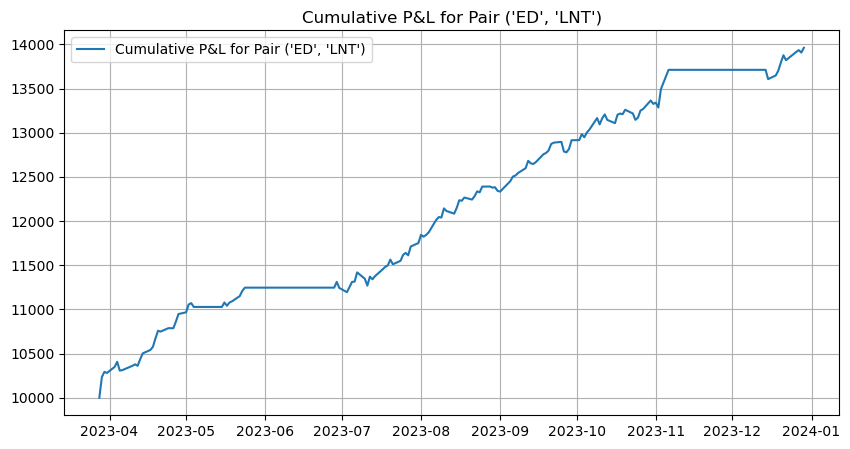

Performance for pair ('ED', 'LNT'):
Cumulative Return: 54.96%
Sharpe Ratio: 6.61
Sortino Ratio: 0.97
Max Drawdown: -1.31%
Test R²: 0.95


Epoch 1/20
38/38 [==============================] - 9s 42ms/step - loss: 0.9775
Epoch 2/20
38/38 [==============================] - 2s 54ms/step - loss: 0.5606
Epoch 3/20
38/38 [==============================] - 2s 52ms/step - loss: 0.1767
Epoch 4/20
38/38 [==============================] - 2s 58ms/step - loss: 0.1270
Epoch 5/20
38/38 [==============================] - 2s 60ms/step - loss: 0.1193
Epoch 6/20
38/38 [==============================] - 2s 63ms/step - loss: 0.0847
Epoch 7/20
38/38 [==============================] - 2s 63ms/step - loss: 0.0739
Epoch 8/20
38/38 [==============================] - 2s 60ms/step - loss: 0.0578
Epoch 9/20
38/38 [==============================] - 2s 64ms/step - loss: 0.0482
Epoch 10/20
38/38 [==============================] - 2s 64ms/step - loss: 0.0690
Epoch 11/20
38/38 [==============================] - 2s 60ms/step - loss: 0.0712
Epoch 12/20
38/38 [==============================] - 2s 62ms/step - loss: 0.1445
Epoch 13/20
38/38 [==================

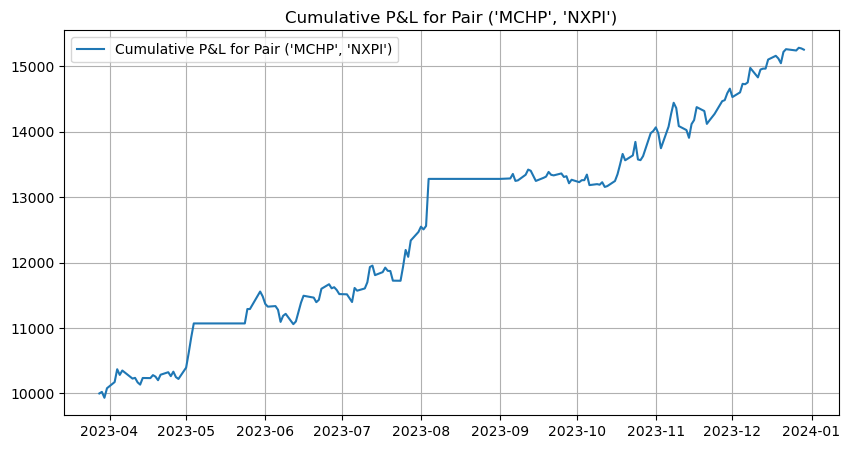

Performance for pair ('MCHP', 'NXPI'):
Cumulative Return: 74.08%
Sharpe Ratio: 3.80
Sortino Ratio: 0.50
Max Drawdown: -4.32%
Test R²: 0.93


Epoch 1/20
38/38 [==============================] - 9s 42ms/step - loss: 1.0333
Epoch 2/20
38/38 [==============================] - 2s 47ms/step - loss: 0.8370
Epoch 3/20
38/38 [==============================] - 2s 55ms/step - loss: 0.3772
Epoch 4/20
38/38 [==============================] - 2s 54ms/step - loss: 0.1599
Epoch 5/20
38/38 [==============================] - 2s 61ms/step - loss: 0.0918
Epoch 6/20
38/38 [==============================] - 2s 57ms/step - loss: 0.1373
Epoch 7/20
38/38 [==============================] - 2s 64ms/step - loss: 0.1065
Epoch 8/20
38/38 [==============================] - 2s 65ms/step - loss: 0.0522
Epoch 9/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0692
Epoch 10/20
38/38 [==============================] - 3s 69ms/step - loss: 0.0460
Epoch 11/20
38/38 [==============================] - 3s 66ms/step - loss: 0.0482
Epoch 12/20
38/38 [==============================] - 2s 63ms/step - loss: 0.0748
Epoch 13/20
38/38 [==================

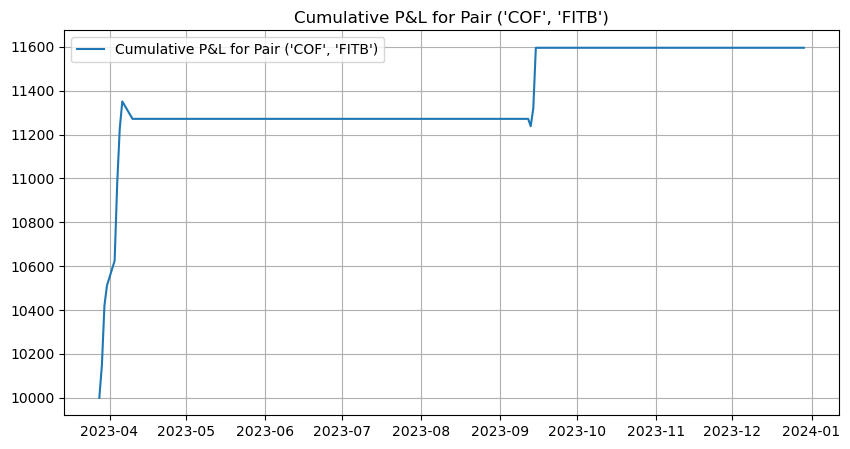

Performance for pair ('COF', 'FITB'):
Cumulative Return: 21.45%
Sharpe Ratio: 2.95
Sortino Ratio: 1.42
Max Drawdown: -1.00%
Test R²: 0.95


Epoch 1/20
38/38 [==============================] - 9s 42ms/step - loss: 1.0036
Epoch 2/20
38/38 [==============================] - 2s 52ms/step - loss: 0.8073
Epoch 3/20
38/38 [==============================] - 2s 54ms/step - loss: 0.3134
Epoch 4/20
38/38 [==============================] - 2s 58ms/step - loss: 0.1291
Epoch 5/20
38/38 [==============================] - 2s 60ms/step - loss: 0.0851
Epoch 6/20
38/38 [==============================] - 3s 77ms/step - loss: 0.1140
Epoch 7/20
38/38 [==============================] - 2s 64ms/step - loss: 0.1444
Epoch 8/20
38/38 [==============================] - 2s 63ms/step - loss: 0.0650
Epoch 9/20
38/38 [==============================] - 3s 66ms/step - loss: 0.0605
Epoch 10/20
38/38 [==============================] - 3s 68ms/step - loss: 0.0809
Epoch 11/20
38/38 [==============================] - 2s 63ms/step - loss: 0.0872
Epoch 12/20
38/38 [==============================] - 2s 64ms/step - loss: 0.0670
Epoch 13/20
38/38 [==================

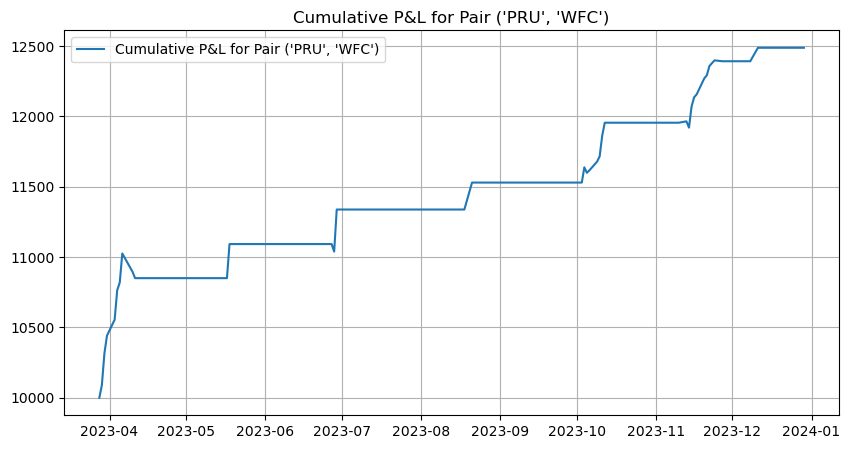

Performance for pair ('PRU', 'WFC'):
Cumulative Return: 33.86%
Sharpe Ratio: 4.15
Sortino Ratio: 1.13
Max Drawdown: -1.59%
Test R²: 0.97


Epoch 1/20
38/38 [==============================] - 8s 39ms/step - loss: 1.0083
Epoch 2/20
38/38 [==============================] - 2s 42ms/step - loss: 0.8660
Epoch 3/20
38/38 [==============================] - 2s 50ms/step - loss: 0.4258
Epoch 4/20
38/38 [==============================] - 2s 48ms/step - loss: 0.1922
Epoch 5/20
38/38 [==============================] - 2s 55ms/step - loss: 0.1276
Epoch 6/20
38/38 [==============================] - 2s 56ms/step - loss: 0.1291
Epoch 7/20
38/38 [==============================] - 2s 58ms/step - loss: 0.0971
Epoch 8/20
38/38 [==============================] - 2s 57ms/step - loss: 0.1102
Epoch 9/20
38/38 [==============================] - 2s 64ms/step - loss: 0.0709
Epoch 10/20
38/38 [==============================] - 2s 56ms/step - loss: 0.0984
Epoch 11/20
38/38 [==============================] - 2s 60ms/step - loss: 0.0696
Epoch 12/20
38/38 [==============================] - 2s 57ms/step - loss: 0.0565
Epoch 13/20
38/38 [==================

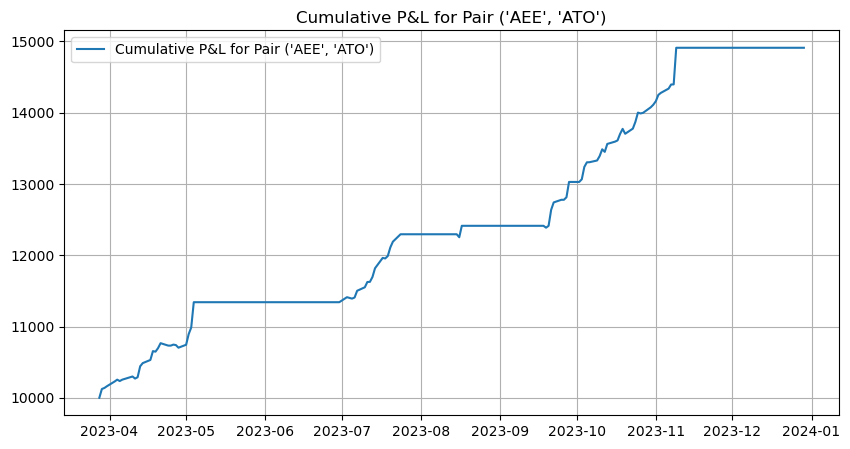

Performance for pair ('AEE', 'ATO'):
Cumulative Return: 68.94%
Sharpe Ratio: 6.67
Sortino Ratio: 3.12
Max Drawdown: -0.59%
Test R²: 0.76


Epoch 1/20
38/38 [==============================] - 8s 38ms/step - loss: 1.0530
Epoch 2/20
38/38 [==============================] - 2s 41ms/step - loss: 0.7755
Epoch 3/20
38/38 [==============================] - 2s 45ms/step - loss: 0.2176
Epoch 4/20
38/38 [==============================] - 2s 52ms/step - loss: 0.1454
Epoch 5/20
38/38 [==============================] - 2s 52ms/step - loss: 0.1045
Epoch 6/20
38/38 [==============================] - 2s 59ms/step - loss: 0.1548
Epoch 7/20
38/38 [==============================] - 2s 56ms/step - loss: 0.1285
Epoch 8/20
38/38 [==============================] - 2s 55ms/step - loss: 0.0790
Epoch 9/20
38/38 [==============================] - 2s 62ms/step - loss: 0.0519
Epoch 10/20
38/38 [==============================] - 2s 56ms/step - loss: 0.0460
Epoch 11/20
38/38 [==============================] - 2s 60ms/step - loss: 0.1406
Epoch 12/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0509
Epoch 13/20
38/38 [==================

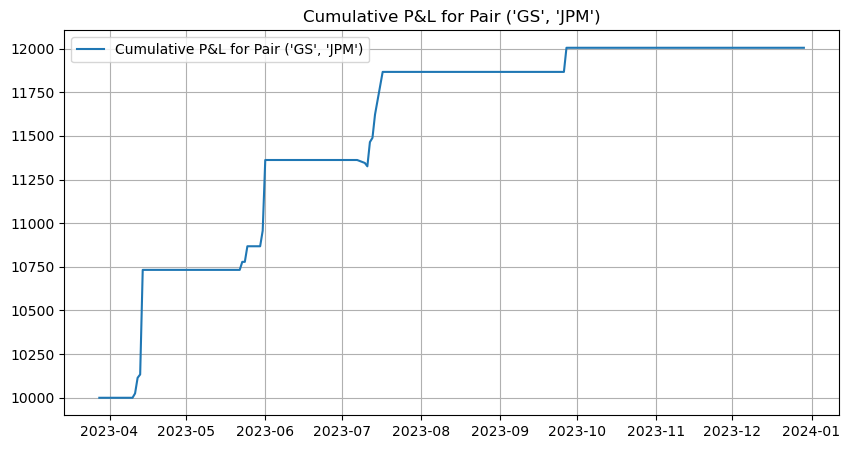

Performance for pair ('GS', 'JPM'):
Cumulative Return: 27.10%
Sharpe Ratio: 2.79
Sortino Ratio: 5.92
Max Drawdown: -0.32%
Test R²: 0.99


Epoch 1/20
38/38 [==============================] - 9s 37ms/step - loss: 0.8775
Epoch 2/20
38/38 [==============================] - 2s 40ms/step - loss: 0.3129
Epoch 3/20
38/38 [==============================] - 2s 44ms/step - loss: 0.1245
Epoch 4/20
38/38 [==============================] - 2s 52ms/step - loss: 0.1446
Epoch 5/20
38/38 [==============================] - 2s 52ms/step - loss: 0.1159
Epoch 6/20
38/38 [==============================] - 2s 54ms/step - loss: 0.0538
Epoch 7/20
38/38 [==============================] - 2s 57ms/step - loss: 0.1179
Epoch 8/20
38/38 [==============================] - 2s 56ms/step - loss: 0.0906
Epoch 9/20
38/38 [==============================] - 2s 60ms/step - loss: 0.0570
Epoch 10/20
38/38 [==============================] - 2s 57ms/step - loss: 0.0703
Epoch 11/20
38/38 [==============================] - 2s 62ms/step - loss: 0.0528
Epoch 12/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0342
Epoch 13/20
38/38 [==================

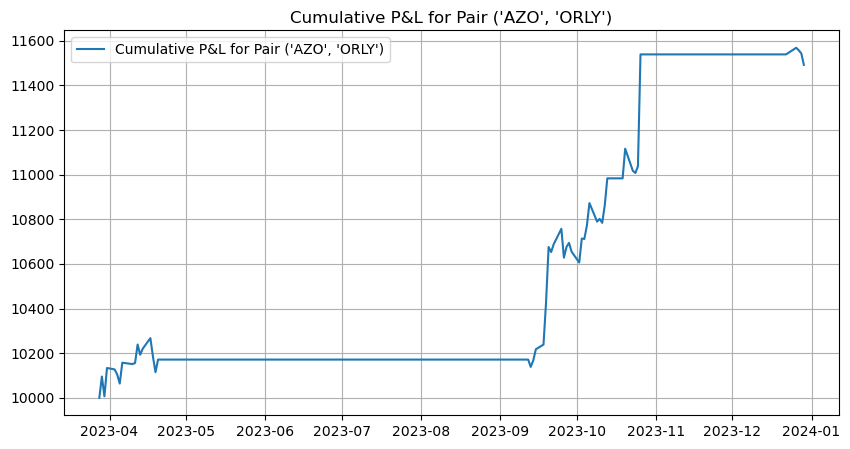

Performance for pair ('AZO', 'ORLY'):
Cumulative Return: 20.02%
Sharpe Ratio: 2.40
Sortino Ratio: 0.42
Max Drawdown: -1.49%
Test R²: 0.99


Epoch 1/20
38/38 [==============================] - 8s 38ms/step - loss: 1.0245
Epoch 2/20
38/38 [==============================] - 2s 41ms/step - loss: 0.9234
Epoch 3/20
38/38 [==============================] - 2s 49ms/step - loss: 0.6235
Epoch 4/20
38/38 [==============================] - 2s 50ms/step - loss: 0.2648
Epoch 5/20
38/38 [==============================] - 2s 55ms/step - loss: 0.1662
Epoch 6/20
38/38 [==============================] - 2s 54ms/step - loss: 0.1646
Epoch 7/20
38/38 [==============================] - 2s 60ms/step - loss: 0.0936
Epoch 8/20
38/38 [==============================] - 2s 56ms/step - loss: 0.0914
Epoch 9/20
38/38 [==============================] - 2s 58ms/step - loss: 0.0628
Epoch 10/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0540
Epoch 11/20
38/38 [==============================] - 2s 56ms/step - loss: 0.0961
Epoch 12/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0951
Epoch 13/20
38/38 [==================

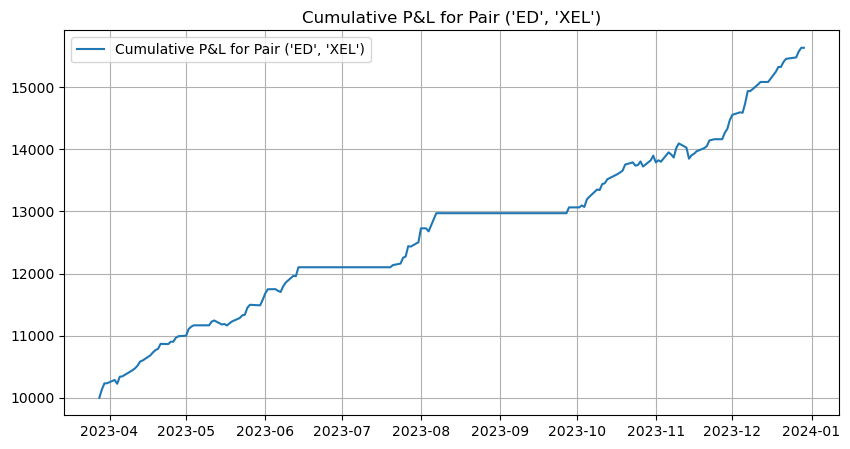

Performance for pair ('ED', 'XEL'):
Cumulative Return: 79.77%
Sharpe Ratio: 8.46
Sortino Ratio: 1.59
Max Drawdown: -1.74%
Test R²: 0.95


Epoch 1/20
38/38 [==============================] - 8s 37ms/step - loss: 0.9961
Epoch 2/20
38/38 [==============================] - 2s 41ms/step - loss: 0.9306
Epoch 3/20
38/38 [==============================] - 2s 49ms/step - loss: 0.6857
Epoch 4/20
38/38 [==============================] - 2s 49ms/step - loss: 0.3590
Epoch 5/20
38/38 [==============================] - 2s 55ms/step - loss: 0.2150
Epoch 6/20
38/38 [==============================] - 2s 53ms/step - loss: 0.1339
Epoch 7/20
38/38 [==============================] - 2s 57ms/step - loss: 0.1343
Epoch 8/20
38/38 [==============================] - 2s 56ms/step - loss: 0.1136
Epoch 9/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0773
Epoch 10/20
38/38 [==============================] - 2s 63ms/step - loss: 0.0609
Epoch 11/20
38/38 [==============================] - 2s 57ms/step - loss: 0.0772
Epoch 12/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0898
Epoch 13/20
38/38 [==================

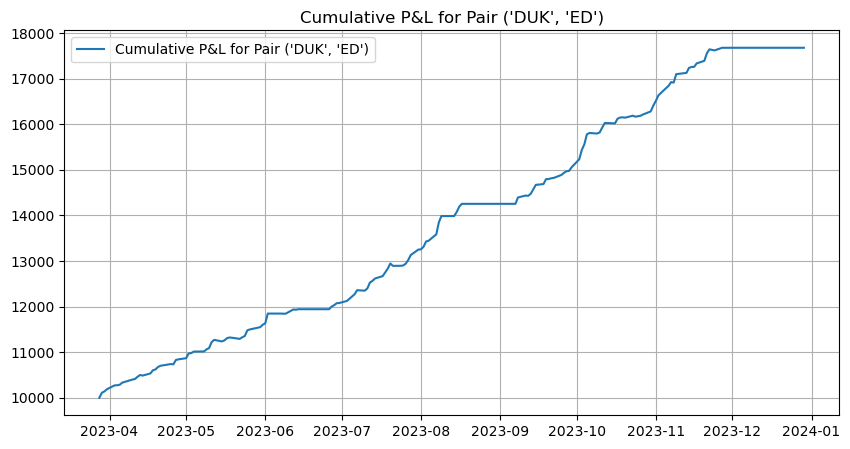

Performance for pair ('DUK', 'ED'):
Cumulative Return: 111.24%
Sharpe Ratio: 12.16
Sortino Ratio: 6.66
Max Drawdown: -0.40%
Test R²: 0.85


Epoch 1/20
38/38 [==============================] - 16s 45ms/step - loss: 0.9311
Epoch 2/20
38/38 [==============================] - 2s 51ms/step - loss: 0.4692
Epoch 3/20
38/38 [==============================] - 3s 84ms/step - loss: 0.1672
Epoch 4/20
38/38 [==============================] - 1799s 49s/step - loss: 0.1063
Epoch 5/20
38/38 [==============================] - 4s 89ms/step - loss: 0.0719
Epoch 6/20
38/38 [==============================] - 2s 51ms/step - loss: 0.0730
Epoch 7/20
38/38 [==============================] - 2s 57ms/step - loss: 0.0595
Epoch 8/20
38/38 [==============================] - 9s 250ms/step - loss: 0.0641
Epoch 9/20
38/38 [==============================] - 19s 489ms/step - loss: 0.0858
Epoch 10/20
38/38 [==============================] - 21s 545ms/step - loss: 0.0763
Epoch 11/20
38/38 [==============================] - 16s 411ms/step - loss: 0.0544
Epoch 12/20
38/38 [==============================] - 6s 160ms/step - loss: 0.0439
Epoch 13/20
38/38 [=======

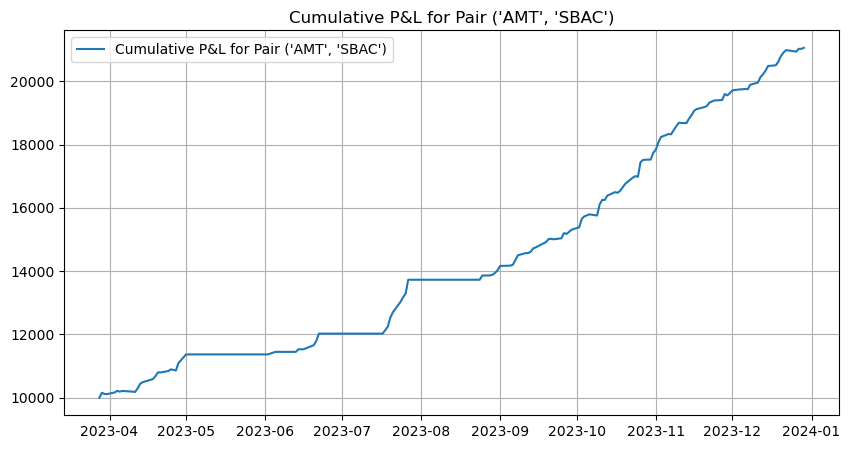

Performance for pair ('AMT', 'SBAC'):
Cumulative Return: 165.80%
Sharpe Ratio: 10.28
Sortino Ratio: 7.53
Max Drawdown: -0.43%
Test R²: 0.97


Epoch 1/20
38/38 [==============================] - 33s 134ms/step - loss: 1.0459
Epoch 2/20
38/38 [==============================] - 5s 139ms/step - loss: 0.9760
Epoch 3/20
38/38 [==============================] - 5s 127ms/step - loss: 0.8469
Epoch 4/20
38/38 [==============================] - 5s 134ms/step - loss: 0.4504
Epoch 5/20
38/38 [==============================] - 25s 684ms/step - loss: 0.1622
Epoch 6/20
38/38 [==============================] - 4s 99ms/step - loss: 0.1672
Epoch 7/20
38/38 [==============================] - 21s 564ms/step - loss: 0.1032
Epoch 8/20
38/38 [==============================] - 878s 24s/step - loss: 0.0946
Epoch 9/20
38/38 [==============================] - 2s 63ms/step - loss: 0.0795
Epoch 10/20
38/38 [==============================] - 2s 59ms/step - loss: 0.0525
Epoch 11/20
38/38 [==============================] - 2s 48ms/step - loss: 0.0382
Epoch 12/20
38/38 [==============================] - 2s 52ms/step - loss: 0.1129
Epoch 13/20
38/38 [========

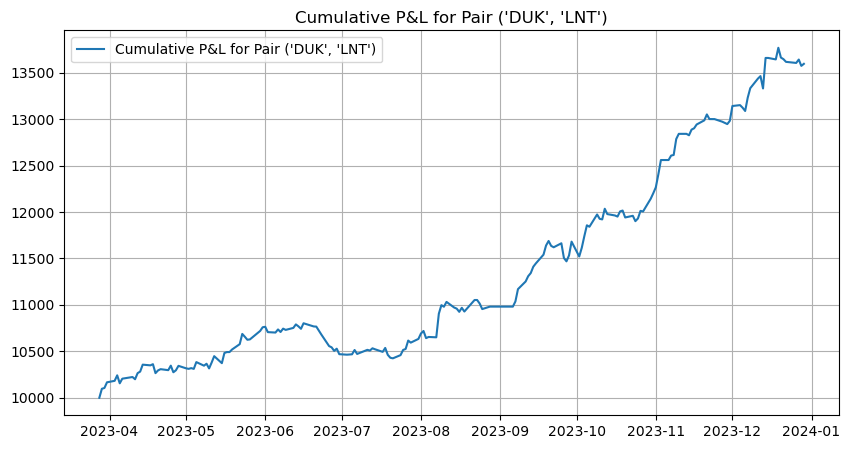

Performance for pair ('DUK', 'LNT'):
Cumulative Return: 49.65%
Sharpe Ratio: 4.54
Sortino Ratio: 0.57
Max Drawdown: -3.49%
Test R²: 0.94


Epoch 1/20
38/38 [==============================] - 971s 702ms/step - loss: 1.0102
Epoch 2/20
38/38 [==============================] - 915s 25s/step - loss: 0.9321
Epoch 3/20
38/38 [==============================] - 2s 59ms/step - loss: 0.5272
Epoch 4/20
38/38 [==============================] - 2s 56ms/step - loss: 0.1758
Epoch 5/20
38/38 [==============================] - 2s 60ms/step - loss: 0.1068
Epoch 6/20
38/38 [==============================] - 2s 56ms/step - loss: 0.0788
Epoch 7/20
38/38 [==============================] - 18s 487ms/step - loss: 0.0707
Epoch 8/20
38/38 [==============================] - 19s 508ms/step - loss: 0.0732
Epoch 9/20
38/38 [==============================] - 24s 625ms/step - loss: 0.0664
Epoch 10/20
38/38 [==============================] - 8s 215ms/step - loss: 0.0476
Epoch 11/20
38/38 [==============================] - 1066s 29s/step - loss: 0.0831
Epoch 12/20
38/38 [==============================] - 2s 63ms/step - loss: 0.0836
Epoch 13/20
38/38 [=====

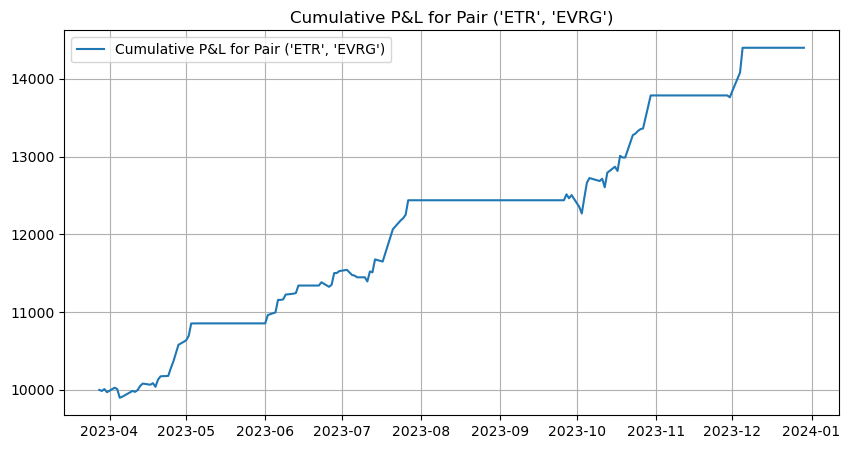

Performance for pair ('ETR', 'EVRG'):
Cumulative Return: 61.38%
Sharpe Ratio: 5.50
Sortino Ratio: 1.09
Max Drawdown: -1.97%
Test R²: 0.94


Epoch 1/20
38/38 [==============================] - 14s 69ms/step - loss: 1.0202
Epoch 2/20
38/38 [==============================] - 3s 86ms/step - loss: 0.9733
Epoch 3/20
38/38 [==============================] - 3s 68ms/step - loss: 0.6053
Epoch 4/20
38/38 [==============================] - 5s 126ms/step - loss: 0.2473
Epoch 5/20
38/38 [==============================] - 6s 148ms/step - loss: 0.1928
Epoch 6/20
38/38 [==============================] - 4s 95ms/step - loss: 0.0899
Epoch 7/20
38/38 [==============================] - 3s 87ms/step - loss: 0.0814
Epoch 8/20
38/38 [==============================] - 3s 71ms/step - loss: 0.1008
Epoch 9/20
38/38 [==============================] - 3s 66ms/step - loss: 0.0999
Epoch 10/20
38/38 [==============================] - 3s 66ms/step - loss: 0.0909
Epoch 11/20
38/38 [==============================] - 3s 67ms/step - loss: 0.1247
Epoch 12/20
38/38 [==============================] - 3s 67ms/step - loss: 0.0423
Epoch 13/20
38/38 [===============

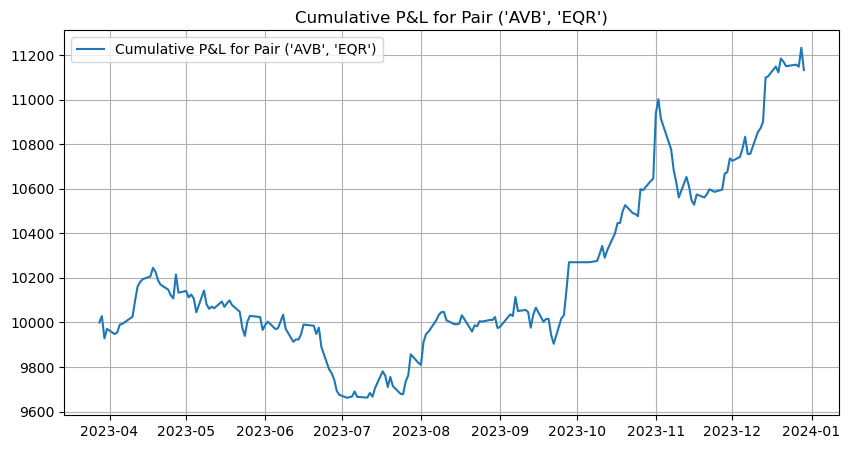

Performance for pair ('AVB', 'EQR'):
Cumulative Return: 15.13%
Sharpe Ratio: 1.79
Sortino Ratio: 0.20
Max Drawdown: -5.69%
Test R²: 0.95


In [4]:
# Function to get stock data (dummy implementation)
def get_stock_data(tickers, start_date, end_date):
    # You need to replace this with actual data fetching
    import yfinance as yf
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Generate LSTM-ready sequences and retain indices
def generate_lstm_features(stock1, stock2, sequence_length=30):
    spread = stock1 - stock2
    features = pd.DataFrame(index=spread.index)
    features['spread'] = spread
    features['zscore'] = (spread - spread.rolling(window=sequence_length).mean()) / spread.rolling(window=sequence_length).std()
    features['spread_change'] = spread.diff()
    features = features.dropna()
    
    sequences = []
    labels = []
    indices = []
    for i in range(len(features) - sequence_length + 1):
        sequences.append(features[['spread', 'zscore', 'spread_change']].iloc[i:i + sequence_length].values)
        labels.append(np.sign(features['spread_change'].iloc[i + sequence_length - 1]))
        indices.append(features.index[i + sequence_length - 1])  # Capture the date index for each sequence

    return np.array(sequences), np.array(labels), indices

# Generate trading signals
def generate_lstm_signals(model, features, indices):
    predictions = model.predict(features)
    signals = pd.DataFrame(predictions.flatten(), index=indices)
    signals.columns = ['signal']
    signals['long'] = (signals['signal'] > 0).astype(int)
    signals['short'] = (signals['signal'] < 0).astype(int)
    return signals

# Define LSTM model
def basic_lstm(sequence_length, feature_size):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(sequence_length, feature_size)))
    model.add(Bidirectional(LSTM(units=64)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='tanh'))  # Output layer activation changed to 'tanh' for normalized output
    model.compile(optimizer=Adam(lr=0.001), loss='mse')
    return model

# Train LSTM model
def train_lstm_model(X_train, y_train, sequence_length, feature_size):
    model = basic_lstm(sequence_length, feature_size)
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)
    return model

# Evaluate LSTM model
def evaluate_lstm_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred.flatten())
    return r2


# Function to backtest pairs with breakage prevention and trading costs
def backtest_pairs_with_breakage(stock1, stock2, signals, test_start, test_end, correlation_threshold=0.8, window=20, initial_capital=10000, trading_cost_bips=5):
    positions = pd.DataFrame(index=signals.index).fillna(0.0)
    positions[stock1.name] = signals['long'] - signals['short']
    positions[stock2.name] = -positions[stock1.name]

    stock1_returns = stock1.pct_change().fillna(0)
    stock2_returns = stock2.pct_change().fillna(0)

    portfolio = pd.DataFrame(index=positions.index)
    portfolio['stock1'] = positions[stock1.name] * stock1_returns
    portfolio['stock2'] = positions[stock2.name] * stock2_returns
    portfolio['total'] = portfolio['stock1'] + portfolio['stock2']
    
    # Calculate trading costs (5 bips = 0.05%)
    trading_cost = trading_cost_bips / 10000
    position_changes = positions.diff().abs()
    trading_costs = position_changes.sum(axis=1) * trading_cost
    
    portfolio['returns'] = portfolio['total'] - trading_costs

    rolling_corr = stock1_returns.rolling(window=window).corr(stock2_returns)

    portfolio['exit'] = (rolling_corr < correlation_threshold).astype(int).shift(1).fillna(0)
    portfolio.loc[portfolio['exit'] == 1, 'returns'] = 0

    test_mask = (portfolio.index >= test_start) & (portfolio.index <= test_end)
    test_portfolio = portfolio[test_mask].copy()

    # Reset cumulative returns for the test period
    test_portfolio['cumulative'] = (test_portfolio['returns'] + 1).cumprod()
    test_portfolio['cumulative'] = test_portfolio['cumulative'] * initial_capital
    test_portfolio.iloc[0, test_portfolio.columns.get_loc('cumulative')] = initial_capital

    return test_portfolio


# Performance metrics calculation functions
def annual_returns(returns):
    num_years = len(returns) / 252
    cum_ret_final = np.prod(returns + 1)
    return cum_ret_final ** (1 / num_years) - 1

def Sharpe(returns, risk_free=0):
    adj_returns = returns - risk_free
    return (np.nanmean(adj_returns) * np.sqrt(252)) / np.nanstd(adj_returns, ddof=1)

def downside_risk(returns, risk_free=0):
    adj_returns = returns - risk_free
    sqr_downside = np.square(np.clip(adj_returns, None, 0))
    return np.sqrt(np.nanmean(sqr_downside) * 252)

def sortino(returns, risk_free=0):
    adj_returns = returns - risk_free
    drisk = downside_risk(adj_returns)
    if drisk == 0:
        return np.nan
    return (np.nanmean(adj_returns) * np.sqrt(252)) / drisk

def max_drawdown(returns):
    wealth_index = 1000 * (1 + returns).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks) / previous_peaks
    return drawdown.min()

# Simplified function to calculate performance metrics
def calculate_performance_metrics(cumulative_pnl, returns):
    cumulative_return = annual_returns(returns) * 100
    sharpe_ratio = Sharpe(returns)
    sortino_ratio = sortino(returns)
    max_drawdown_value = max_drawdown(returns) * 100

    return cumulative_return, sharpe_ratio, sortino_ratio, max_drawdown_value

# The main loop remains unchanged, but remember to store five values in performance_metrics:
# performance_metrics[pair] = (cumulative_return, sharpe_ratio, sortino_ratio, max_drawdown_value, test_r2)


def calculate_drawdown(returns):
    wealth_index = 1000 * (1 + returns).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdown = (wealth_index - previous_peaks) / previous_peaks
    return drawdown


# Define training and testing periods
train_start = '2018-01-01'
train_end = '2022-12-31'
test_start = '2023-01-01'
test_end = '2023-12-31'

# Loop through each pair and process
results = {}
performance_metrics = {}
for pair, data in all_stock_data.items():
    stock1, stock2 = data[pair[0]], data[pair[1]]
    
    # Filter training and testing data
    train_mask = (stock1.index >= train_start) & (stock1.index <= train_end)
    test_mask = (stock1.index >= test_start) & (stock1.index <= test_end)
    
    stock1_train = stock1[train_mask]
    stock2_train = stock2[train_mask]
    stock1_test = stock1[test_mask]
    stock2_test = stock2[test_mask]
    
    # Generate features for training data
    sequences, labels, indices = generate_lstm_features(stock1_train, stock2_train)
    if len(sequences) == 0:  # Ensure there are sequences
        continue

    # Train the model using training data
    model = train_lstm_model(sequences, labels, len(sequences[0]), len(sequences[0][0]))
    
    # Generate features and signals for the testing period
    test_sequences, test_labels, test_indices = generate_lstm_features(stock1_test, stock2_test)
    test_signals = generate_lstm_signals(model, test_sequences, test_indices)
    
    # Backtest using the signals generated from the test period
    portfolio = backtest_pairs_with_breakage(stock1, stock2, test_signals, test_start, test_end)
    results[pair] = portfolio
    
    # Evaluate model performance
    test_r2 = evaluate_lstm_model(model, test_sequences, test_labels)
    
    # Calculate performance metrics
    cumulative_return, sharpe_ratio, sortino_ratio, max_drawdown_value = calculate_performance_metrics(portfolio['cumulative'].pct_change().dropna(), portfolio['returns'])
    performance_metrics[pair] = (cumulative_return, sharpe_ratio, sortino_ratio, max_drawdown_value, test_r2)
    
    # Visualization and performance metrics
    plt.figure(figsize=(10, 5))
    plt.plot(portfolio['cumulative'], label=f"Cumulative P&L for Pair {pair}")
    plt.title(f"Cumulative P&L for Pair {pair}")
    plt.legend()
    plt.grid(True)
    plt.show()
    

    # Print performance metrics
    print(f"Performance for pair {pair}:")
    print(f"Cumulative Return: {cumulative_return:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Sortino Ratio: {sortino_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown_value:.2f}%")
    print(f"Test R²: {test_r2:.2f}")


## HYPERPARAMETER TUNING